impactClass_examples

Basic demo of the impactClass showing how to initialize and make plots

Sophie Hourihane
2018-07-13

In [1]:
# import
import numpy as np
import os
import pathlib
import healpy as hp
import pickle
import matplotlib.pyplot as plt
import microTools
import datetime
from impactClass import impactClass
from impactClass import impactClassList
import copy
%matplotlib inline

In [2]:
# pick a segment time and load the data 
segment = 1147740231

# setup directory structure
p = pathlib.PurePath(os.getcwd())
baseDir = str(p.parent)

# load GRS1
chainFile = baseDir + '/data/' + str(segment) + '_grs1.pickle'
fid = open(chainFile,'rb')
data1 = pickle.load(fid, encoding = 'latin1')
impact1 = impactClass(chainFile)
fid.close()

# load GRS2
chainFile = baseDir + '/data/' + str(segment) +'_grs2.pickle'
if os.path.exists(chainFile) :
    fid = open(chainFile,'rb')
    data2 = pickle.load(fid)
    impact2 = impactClass(chainFile)

    fid.close()

# make plot directory
plotDir = baseDir+'/plots/'+str(segment)
if not os.path.exists(plotDir):
    os.makedirs(plotDir)
print(plotDir)

/Users/shouriha/LISAPathfinder/scripts/Analysis/plots/1147740231


In [3]:
# Making a list of impacts into a class was a dumb idea that I will undo, 
# For now here it is though, takes a hot second to grab all the files
impactList = impactClassList(grs = 1, getValid = True)



Reading through pickle files


In [4]:
# Make Summary table
# Make sure \usepackage{longtable} is at the beginning of the doc
print(impactList.summaryTable())


		\begingroup
		\renewcommand\arraystretch{2}
		\begin{longtable}{|c|c|c|c|c|c|c|c|c|}
			\multicolumn{9}{c}
			{{\bfseries \tablename\  \thetable{}}}\\
			\hline \multicolumn{1}{|c}{\textbf{Date}} & 
			\multicolumn{1}{|c|}{\textbf{GPS}}  & 
			\multicolumn{1}{|c|}{\bf{$\rho_{med}$ [$\mu Ns$]}} & 
			\multicolumn{1}{|c|}{\textbf{Face}} &
			\multicolumn{1}{|c|}{\textbf{Sky Area}} &
			\multicolumn{1}{|c|}{\textbf{$Lat_{SC}$}} &
			\multicolumn{1}{|c|}{\textbf{$Lon_{SC}$}} &
			\multicolumn{1}{|c|}{\textbf{$Lat_{sun}$}} &
			\multicolumn{1}{|c|}{\textbf{$Lon_{sun}$}} \\
			\hline
		\endfirsthead
		
		\multicolumn{9}{c}
			{{\bfseries \tablename\  \thetable{} -- continued from previous page}} \\
		\hline \multicolumn{1}{|c|}{\textbf{Date}} & 
			\multicolumn{1}{|c|}{\textbf{GPS}}  & 
			\multicolumn{1}{|c|}{\bf{$\rho_{med}$ [$\mu Ns$]}} & 
			\multicolumn{1}{|c|}{\textbf{Face}} &
			\multicolumn{1}{|c|}{\textbf{Sky Area}} &
			\multicolumn{1}{|c|}{\textbf{$Lat_{SC}$}} &
			\multicolumn

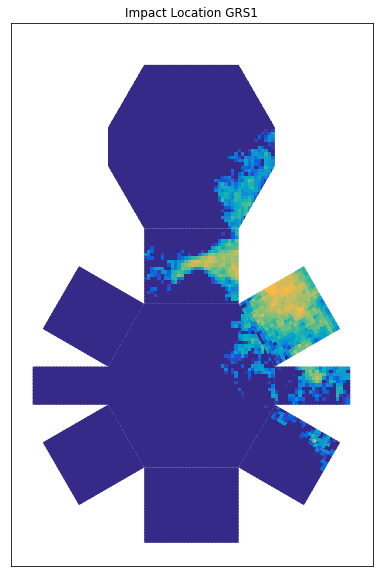

In [5]:
# 2D LPF Working Correctly
fig = impact1.makeFlatLPF( N = 50, scale = 'log')

/Users/shouriha/anaconda2/envs/skymaps/lib/python3.6/site-packages/matplotlib/colors.py:486: UserWarning: Warning: converting a masked element to nan.
  xa = np.array([X])


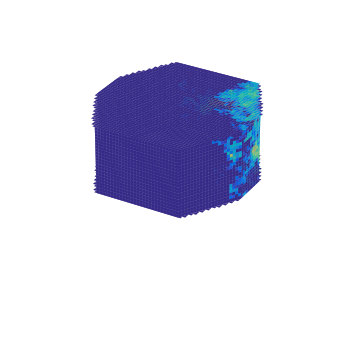

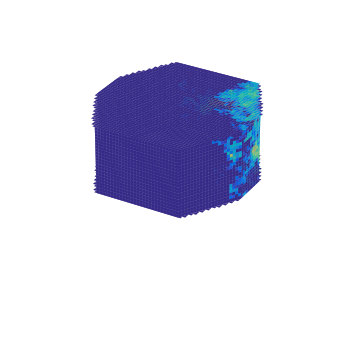

In [6]:
# 3D LPF Working Correctly

# Creates a single 3D image
impact1.make3DLPF()

# Creates Directory for future gifs
#impact1.fillGifDir(baseDir + '/plots/' + str(segment))

# Creates gif using above directory
#impact1.gif_maker(baseDir + '/plots/' + str(segment))

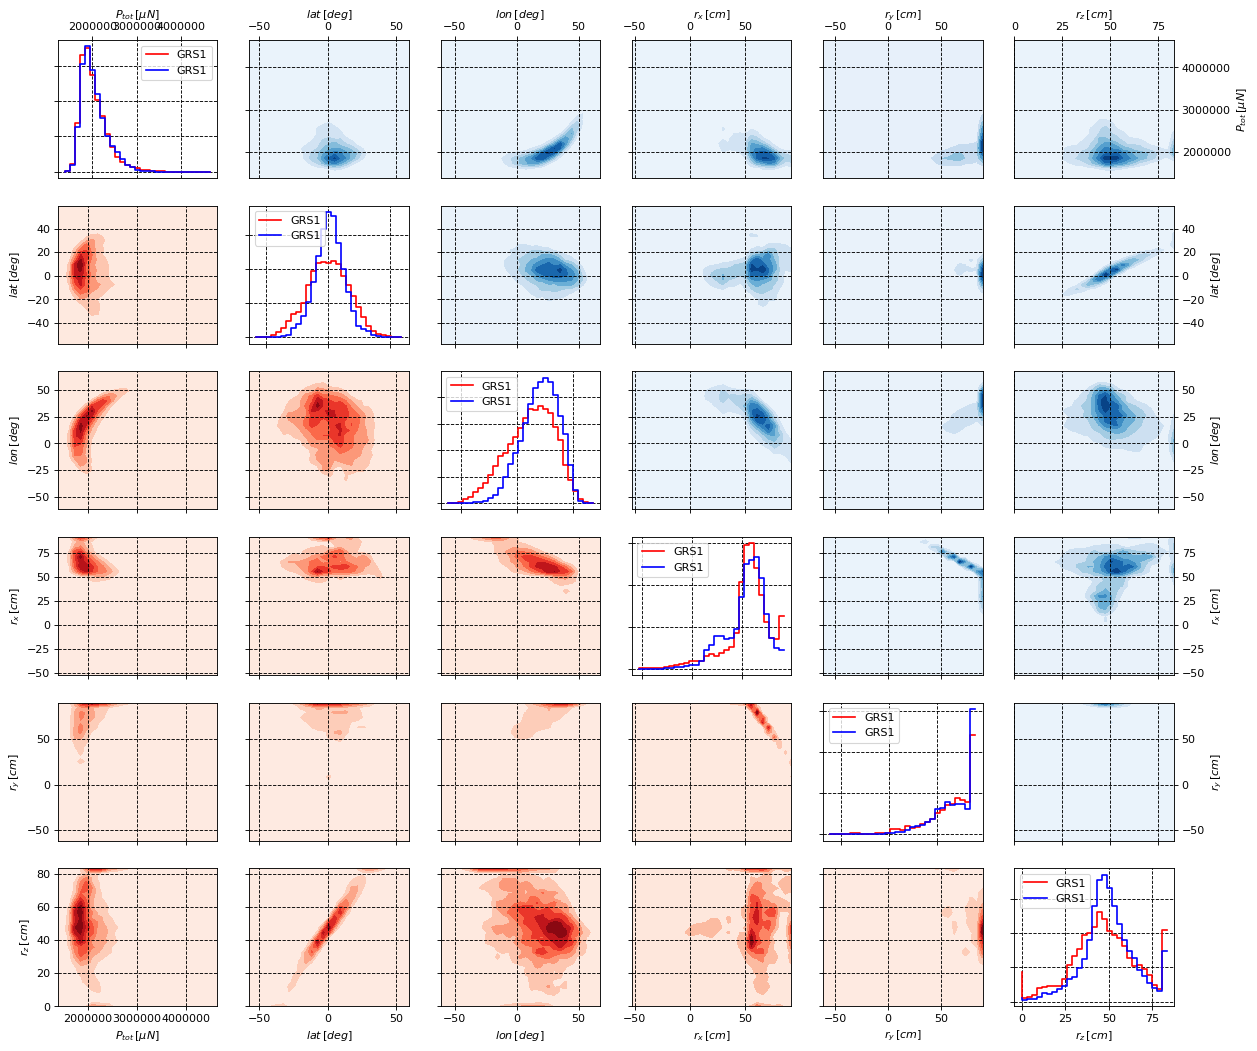

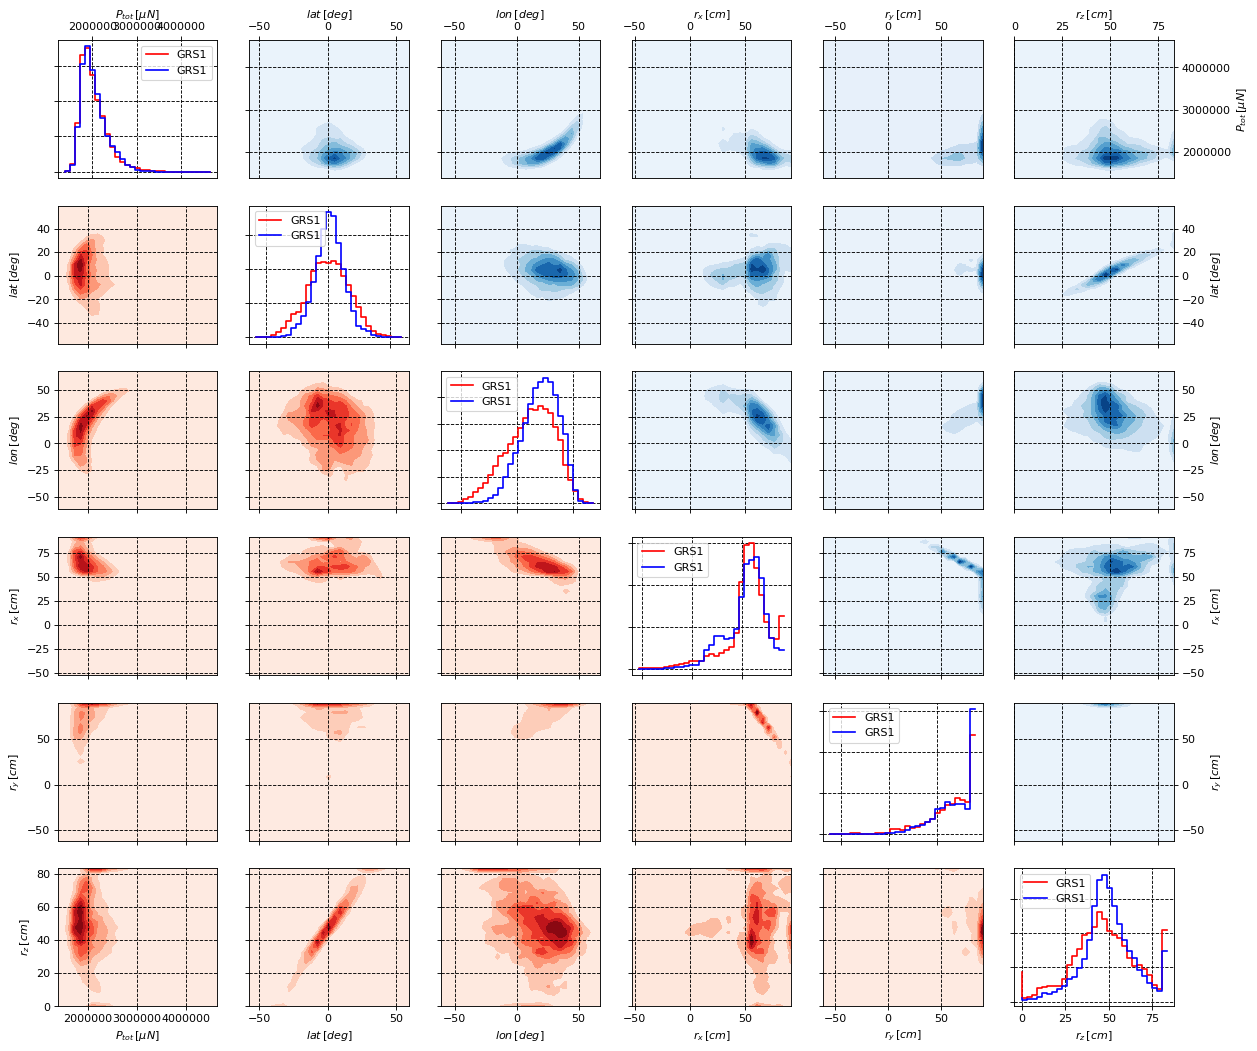

In [7]:
# Dual Corner Working Correctly
# Class
impact1.dualCorner(impact2)

# Dictionary
#hf = microTools.dualCorner(data1,data2)
#hf.savefig(plotDir+'/dualCorner.png',format='png')

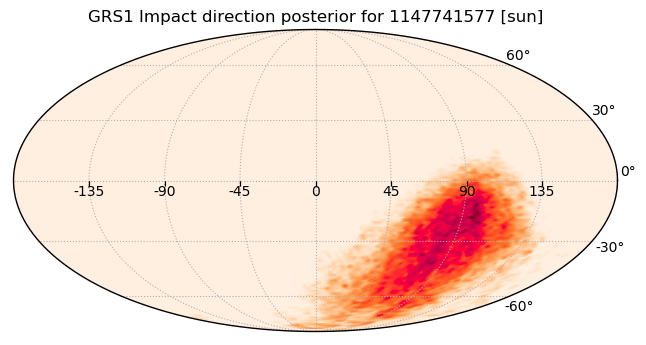

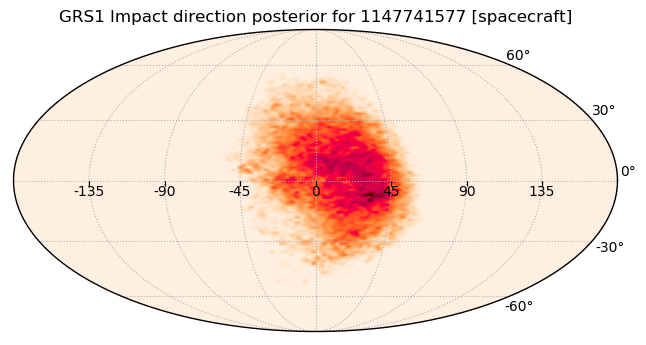

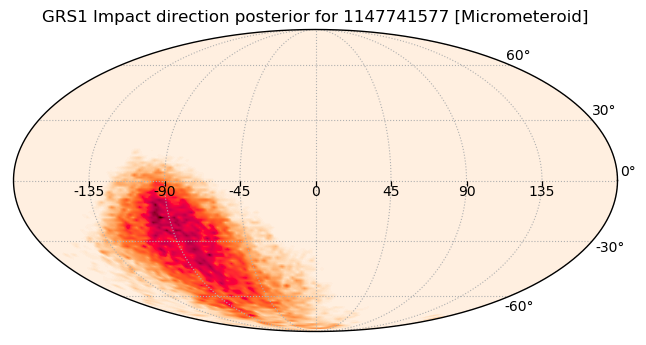

In [8]:
# make the skymaps in the two frames
# Mollewide Working Correctly

fig = impact1.makeMollweide(frame = 'sun')
fig = impact1.makeMollweide(frame = 'sc')
fig = impact1.makeMollweide(frame = 'micro')